In [1]:
import numpy as np
from sklearn.neighbors import  KNeighborsClassifier
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import glob
import matplotlib.pyplot as plt


In [2]:
# Specify the path for the files
dir_path = "data/"

# Use glob to find all files ending with .npy
npy_files = glob.glob(os.path.join(dir_path, '*.npy'))
files = []

# Iterate over the files
for file in npy_files:
    files.append([file])
    # np.append(files, [file])

files = np.array(files)

In [24]:
arr_data = [[[55, 168], [59, 177], [62, 183], [67, 193], [71, 200], [81, 208], [88, 212], [101, 216], [117, 217], [130, 216], [141, 215], [161, 212], [181, 210], [194, 209], [214, 209], [227, 209], [249, 210], [264, 212], [282, 214], [292, 215], [303, 214], [311, 213], [320, 211], [326, 209], [327, 209], [327, 209], [328, 204], [321, 193], [311, 185], [290, 175], [273, 170], [247, 166], [230, 166], [201, 167], [182, 168], [159, 170], [139, 170], [129, 170], [117, 171], [110, 172], [102, 172], [97, 173], [89, 174], [86, 174], [81, 177], [78, 179], [74, 182], [71, 185], [68, 187], [65, 189], [64, 190], [61, 190], [60, 190], [59, 188], [59, 187], [58, 185]], [[65, 187], [69, 190], [75, 194], [83, 205], [88, 214], [93, 227], [95, 235], [97, 245], [97, 251], [98, 261], [98, 267], [100, 278], [101, 285], [105, 296], [109, 303], [119, 312], [131, 318], [140, 321], [155, 322], [168, 321], [188, 319], [202, 317], [223, 313], [236, 310], [252, 306], [262, 304], [274, 302], [282, 299], [292, 297], [299, 294], [304, 291], [310, 284], [314, 278], [319, 267], [322, 259], [325, 247], [326, 240], [327, 233], [328, 230], [328, 229], [328, 229], [328, 228], [327, 222], [324, 216], [319, 206], [317, 201], [315, 197], [315, 197], [315, 197]]]

In [ ]:
arr_img = np.array()

In [3]:
test_load = np.load(files[0][0])
print(files[0][0][5:-4])
print(len(test_load[:100]))

vase
100


In [32]:
def convert_to_grayscale(strokes, input_size=400, output_size=28):
    # Create a blank canvas
    canvas = np.zeros((output_size, output_size), dtype=np.float32)
    
    for stroke in strokes:
        for i in range(len(stroke) - 1):
            x1, y1 = stroke[i]
            x2, y2 = stroke[i + 1]
            
            # Scale coordinates from 400x400 to 28x28
            x1, y1 = int(x1 * output_size / input_size), int(y1 * output_size / input_size)
            x2, y2 = int(x2 * output_size / input_size), int(y2 * output_size / input_size)
            
            # Ensure coordinates are within bounds
            x1, y1 = max(0, min(x1, output_size - 1)), max(0, min(y1, output_size - 1))
            x2, y2 = max(0, min(x2, output_size - 1)), max(0, min(y2, output_size - 1))
            
            # Draw line using Bresenham's line algorithm
            dx = abs(x2 - x1)
            dy = abs(y2 - y1)
            sx = 1 if x1 < x2 else -1
            sy = 1 if y1 < y2 else -1
            err = dx - dy
            
            while True:
                canvas[y1, x1] = 1  # Set pixel to white
                if x1 == x2 and y1 == y2:
                    break
                e2 = 2 * err
                if e2 > -dy:
                    err -= dy
                    x1 += sx
                if e2 < dx:
                    err += dx
                    y1 += sy
    
    return canvas

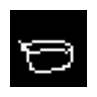

In [33]:
plt.figure(figsize=(1,1))
plt.imshow(convert_to_grayscale(arr_data), cmap='gray')
plt.axis("off") 
plt.show()

In [3]:
x = []
y = []
for i in range(10):
    temp_file = np.load(files[i][0])
    for arr in temp_file[i:10000]:
        x.append(arr)
        y.append(files[i][0][5:-4])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [6]:
predict = knn.predict(x_test)

In [8]:
accuracy_score(y_test, predict)
# print(y_test)

0.8487819518783453

In [46]:
result = knn.predict([x_train[1]])
print(result[0])

apple


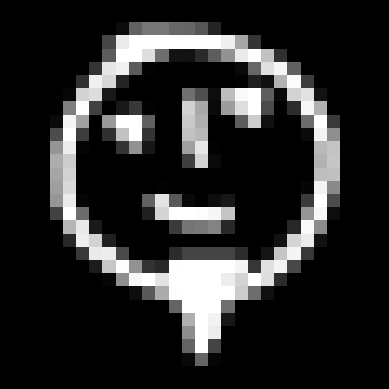

In [29]:

plt.imshow(x_train[1].reshape(28,28), cmap="grey")
plt.axis("off")
plt.show()

In [49]:
x_train[0].shape

(784,)

In [7]:
import pickle

with open("knn.pkl", "wb") as f:
    pickle.dump(knn, f)